In [74]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('titanic'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

titanic/test.csv
titanic/train.csv
titanic/gender_submission.csv


In [75]:
titanic = pd.read_csv('titanic/train.csv')
titanic_test = pd.read_csv('titanic/test.csv')

In [76]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state=0, max_depth=5)

In [77]:
X = titanic
y = X.pop('Survived')

In [78]:
X = X.drop(columns=['Name', 'Ticket', 'Cabin'])
X = pd.get_dummies(X, dummy_na=True).fillna(-1)
X

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Sex_nan,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,3,22.0,1,0,7.2500,0,1,0,0,0,1,0
1,2,1,38.0,1,0,71.2833,1,0,0,1,0,0,0
2,3,3,26.0,0,0,7.9250,1,0,0,0,0,1,0
3,4,1,35.0,1,0,53.1000,1,0,0,0,0,1,0
4,5,3,35.0,0,0,8.0500,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,0,1,0,0,0,1,0
887,888,1,19.0,0,0,30.0000,1,0,0,0,0,1,0
888,889,3,-1.0,1,2,23.4500,1,0,0,0,0,1,0
889,890,1,26.0,0,0,30.0000,0,1,0,1,0,0,0


In [79]:
columns = X.columns

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

In [81]:
clf = clf.fit(X_train, y_train)

In [82]:

clf.score(X_train, y_train)

0.8696629213483146

In [83]:
clf.score(X_test, y_test)

0.7645739910313901

[Text(195.9340909090909, 199.32, 'Sex_female <= 0.5\ngini = 0.464\nsamples = 445\nvalue = [282, 163]\nclass = No'),
 Text(121.74545454545455, 163.07999999999998, 'Embarked_C <= 0.5\ngini = 0.303\nsamples = 296\nvalue = [241, 55]\nclass = No'),
 Text(60.872727272727275, 126.83999999999999, 'Fare <= 11.988\ngini = 0.257\nsamples = 251\nvalue = [213, 38]\nclass = No'),
 Text(30.436363636363637, 90.6, 'PassengerId <= 585.0\ngini = 0.162\nsamples = 135\nvalue = [123, 12]\nclass = No'),
 Text(15.218181818181819, 54.359999999999985, 'PassengerId <= 577.5\ngini = 0.24\nsamples = 79\nvalue = [68, 11]\nclass = No'),
 Text(7.609090909090909, 18.119999999999976, 'gini = 0.224\nsamples = 78\nvalue = [68, 10]\nclass = No'),
 Text(22.827272727272728, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes'),
 Text(45.654545454545456, 54.359999999999985, 'Fare <= 7.91\ngini = 0.035\nsamples = 56\nvalue = [55, 1]\nclass = No'),
 Text(38.04545454545455, 18.119999999999976, 'gini = 0.0\

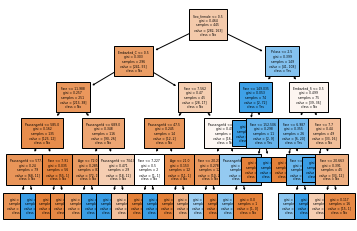

In [84]:
from sklearn import tree
tree.plot_tree(clf, feature_names=columns, class_names=['No', 'Yes', '?'], filled=True, fontsize=3) 

In [85]:
X_test = titanic_test
X_test = X_test.drop(columns=['Name', 'Ticket', 'Cabin'])
X_test = pd.get_dummies(X_test, dummy_na=True).fillna(-1)
y_test = clf.predict(X_test)

In [86]:
output = pd.DataFrame({'PassengerId': X_test['PassengerId'], 'Survived': y_test})
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [87]:
output[['PassengerId', 'Survived']].to_csv('titanic_test.csv', index=False)